<a href="https://colab.research.google.com/github/fatimahadnan0/Application_phase_2/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python tensorflow numpy matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121

In [ ]:
# Define the file paths for the training and testing images
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
# Set the image dimensions and the number of classes
img_width, img_height = 224, 224
num_classes = 50

In [ ]:
# Load the DenseNet121 model with pre-trained weights
model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

In [ ]:
# Freeze the layers of the base model to prevent their weights from being updated
for layer in model.layers:
    layer.trainable = False

In [ ]:
# Initialize the arrays to store the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
# Create a dictionary to map label names to integer values
label_map = {}
label_count = 0
for file_name in os.listdir(train_path):
    if file_name not in label_map:
        label_map[file_name] = label_count
        label_count += 1

In [ ]:
# Use the label map to convert string labels to integer values
for file_name in os.listdir(train_path):
    person_path = os.path.join(train_path, file_name)
    for image_name in os.listdir(person_path):
        image_path = os.path.join(person_path, image_name)
        train_image = cv2.imread(image_path)
        resized_image = cv2.resize(train_image, (img_width, img_height))
        train_images.append(resized_image)
        train_labels.append(label_map[file_name])

In [ ]:
# Use the label map to convert string labels to integer values
for file_name in os.listdir(test_path):
    person_path = os.path.join(test_path, file_name)
    for image_name in os.listdir(person_path):
        image_path = os.path.join(person_path, image_name)
        val_image = cv2.imread(image_path)
        resized_image = cv2.resize(val_image, (img_width, img_height))
        test_images.append(resized_image)
        test_labels.append(label_map[file_name])

In [ ]:
# Convert the image arrays to numpy arrays and normalize the pixel values
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

In [ ]:
# Convert the label arrays to numpy arrays and one-hot encode the labels
train_labels = to_categorical(np.array(train_labels), num_classes)
test_labels = to_categorical(np.array(test_labels), num_classes)

In [ ]:
# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [ ]:
# Add a custom head to the model to perform the classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=16, validation_data=(val_images, val_labels))

# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)

Epoch 1/10
25/25 [==============================] - 55s 2s/step - loss: 1.3407 - accuracy: 0.5696 - val_loss: 0.7679 - val_accuracy: 0.4141
Epoch 2/10
25/25 [==============================] - 53s 2s/step - loss: 0.6833 - accuracy: 0.6051 - val_loss: 0.8935 - val_accuracy: 0.5859
Epoch 3/10
25/25 [==============================] - 54s 2s/step - loss: 0.7453 - accuracy: 0.5747 - val_loss: 0.6673 - val_accuracy: 0.5859
Epoch 4/10
25/25 [==============================] - 62s 2s/step - loss: 0.6749 - accuracy: 0.6253 - val_loss: 0.7756 - val_accuracy: 0.5859
Epoch 5/10
25/25 [==============================] - 54s 2s/step - loss: 0.6281 - accuracy: 0.6329 - val_loss: 0.7563 - val_accuracy: 0.5960
Epoch 6/10
25/25 [==============================] - 53s 2s/step - loss: 0.6278 - accuracy: 0.6456 - val_loss: 0.5994 - val_accuracy: 0.6667
Epoch 7/10
25/25 [==============================] - 52s 2s/step - loss: 0.5812 - accuracy: 0.7063 - val_loss: 0.5730 - val_accuracy: 0.7172
Epoch 8/10
25/25 [==

In [ ]:
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6148285269737244
Test accuracy: 0.7070707082748413


In [ ]:
# Extract the accuracy and loss values from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


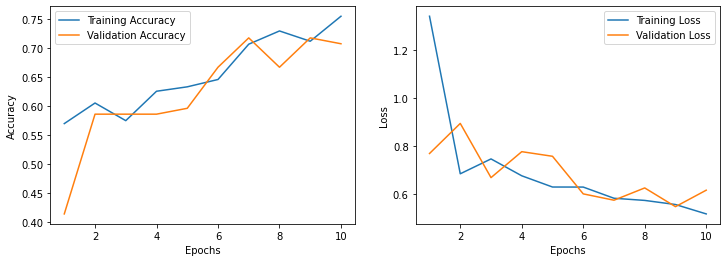

In [ ]:
# Plot the accuracy and loss values over the epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()